In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
def process_and_plot_fps(base_root1, base_root2):
    def process_fps(base_root):
        results = []
        for root, dirs, files in os.walk(base_root):
            # Looking for folders that end with _zed
            if os.path.basename(root).endswith("_zed"):
                participant_id = root.split(os.sep)[-2]  # get parent folder (participant)
                for file in files:
                    if file.endswith(".csv"):
                        file_path = os.path.join(root, file)
                        try:
                            with open(file_path, 'r') as f:
                                num_rows = sum(1 for _ in f) - 1  # exclude header
                            fps = num_rows / 40  # 40 seconds trial
                            results.append({
                                "Participant": participant_id,
                                "File": file,
                                "Frames": num_rows,
                                "FPS": round(fps, 2),
                                "Group": os.path.basename(base_root)
                            })
                        except Exception as e:
                            print(f"❌ Error processing {file_path}: {e}")
        return pd.DataFrame(results)
    
    df1 = process_fps(base_root1)
    df2 = process_fps(base_root2)
    
    df = pd.concat([df1, df2], ignore_index=True)
    
    if df.empty:
        print("No valid CSV files found.")
        return
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x="FPS", y="Group", data=df, inner=None, palette="pastel", linewidth=0.6)
    sns.boxplot(x="FPS", y="Group", data=df, width=0.2, color="gray", fliersize=0)
    sns.stripplot(x="FPS", y="Group", data=df, size=5, color="black", alpha=0.5, jitter=0.25)

    plt.title("Raincloud Plot of ZED FPS Values by Group", fontsize=14)
    plt.xlabel("Frames Per Second (FPS)")
    plt.ylabel("Participant Group")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21536\2570422294.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="FPS", y="Group", data=df, inner=None, palette="pastel", linewidth=0.6)


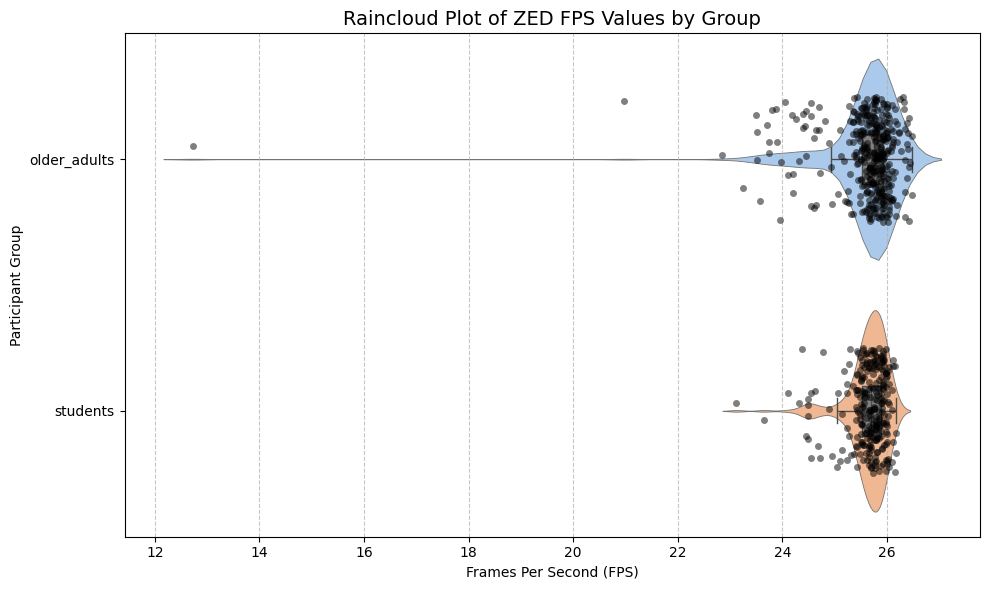

In [3]:
process_and_plot_fps(
    base_root1=os.path.join("..", "..", "data", "raw", "older_adults"),
    base_root2=os.path.join("..", "..", "data", "raw", "students")
)

### Remove Anomalies

In [4]:
# Load the measurements data
file_path = "../../data/processed/older_adults/measurements.csv"
df = pd.read_csv(file_path)

# Define the combinations to remove
to_remove = [
    ("dida", "closed", 5),
    ("yossef", "open", 3),
]

# Filter them out
for name, state, trial in to_remove:
    df = df[~(
        (df["participant name"] == name) &
        (df["state"] == state) &
        (df["trial"] == trial)
    )]

# Optional: Reset index after filtering
df.reset_index(drop=True, inplace=True)

# Save the filtered data
df.to_csv("../../data/processed/older_adults/filtered_measurements.csv", index=False)